In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
from __future__ import print_function

import numpy as np

from astropy.io import fits

In [3]:
np.random.seed(42)

In [23]:

generator = rotate_angle_generator()

def image_augementation_generator(zoom_factor):
    def _rotate_angle_generator():
        while True:
            angle = np.random.randint(0, 360)
            yield angle

    def _zoom_generator():
        while True:
            zoom = np.round(zoom_factor * (np.random.random() - 0.5), 3) + 1.0
            yield zoom

    def _boolean_generator():
        while True:
            prob = np.random.random()
            yield prob >= 0.5

    rotate_angle_generator = _rotate_angle_generator()
    zoom_generator = _zoom_generator()
    horiztonal_flip_generator = _boolean_generator()
    vertical_flip_generator = _boolean_generator()
    
    while True:
        rotate_angle = next(rotate_angle_generator)
        zoom = next(zoom_generator)
        horiztonal_flip = next(horiztonal_flip_generator)
        vertical_flip = next(vertical_flip_generator)
        
        yield rotate_angle, zoom, horiztonal_flip, vertical_flip

for idx, value in enumerate(image_augementation_generator(0.1)):
    print(value)
    if idx == 20:
        break

(146, 0.985, False, True)
(127, 1.002, True, True)
(150, 1.004, True, False)
(143, 1.032, True, True)
(1, 1.05, True, True)
(159, 1.013, False, False)
(303, 1.035, True, False)
(160, 1.014, False, False)
(103, 1.011, False, False)
(98, 1.047, False, False)
(193, 1.019, True, False)
(160, 0.952, False, False)
(134, 1.022, False, True)
(21, 0.974, True, False)
(263, 1.013, True, True)
(283, 1.017, True, False)
(303, 0.978, False, True)
(16, 1.049, False, False)
(5, 0.987, False, True)
(301, 1.047, True, True)
(190, 0.981, False, False)


In [10]:
np.random.random()

0.44583275285359114

In [24]:
%ls -l

total 49728
-rw-r--r--   1 will  staff    638129 19 Apr 14:36 ANNGalaxyClassification.ipynb
-rw-r--r--   1 will  staff    208088 20 Apr 19:37 BasicCNN.ipynb
-rw-r--r--   1 will  staff     26566  6 Apr 16:56 Cutout Scratchpad.ipynb
-rw-r--r--   1 will  staff     21153 22 Apr 12:45 Determined Images Cutout.ipynb
-rw-r--r--   1 will  staff      6190 28 Feb 21:44 Download FITS Files.ipynb
-rw-r--r--   1 will  staff      3740  7 Feb 18:47 Download FITS Files.py
-rw-r--r--   1 will  staff    227606 31 Mar 22:02 Exploratory Data Analysis.ipynb
-rw-r--r--   1 will  staff     28360  7 Apr 21:13 FITS cutout.ipynb
-rw-r--r--   1 will  staff    324523  7 Apr 21:14 Feature Importance.ipynb
-rw-r--r--   1 will  staff      8675  6 Apr 12:50 Fits Processing.ipynb
-rw-r--r--   1 will  staff    180206  7 Apr 21:13 Galaxy Classification Feature Importances.ipynb
-rw-r--r--   1 will  staff     20444 17 Apr 20:27 Image Cutout v2.ipynb
-rw-r--r--   1 will  staff     11976 28 Feb 21:43 Image Stretch Grid.ipy

In [156]:
fits_file = fits.open('obj-1237658491746254860.fits.bz2')

In [157]:
from astropy.wcs import WCS

WCS(fits_file[0].header)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'RA---TAN'  'DEC--TAN'  ''  
CRVAL : 188.75098580302  9.243637847041  0.0  
CRPIX : -310.24214188151  207.26707883587  0.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.00010996654875867  0.00010996654875867  1.0  
NAXIS : 72  72  3

In [151]:
def plot_images(imgs, size):
    num_rows = int(np.ceil(size/3.0))
    figsize_y = 5 * num_rows

    fig = plt.figure(figsize=(20,figsize_y))
    for idx in range(0, size):
        img = imgs[idx]
        # make scale between 0 and 1.0 plotting
        img_min = img.min()
        img_max = img.max()
        img = (img - img_min) / (img_max - img_min)

        fig.add_subplot(num_rows, 3, idx + 1)
        plt.imshow(img, cmap=plt.get_cmap('gray'), interpolation='bicubic')

    plt.show()

/Users/will/Development/Astronomy/proposal/ENV/lib/python3.7/site-packages/sdss_gz_data/sdss_gz_data.py:392: RuntimeWarning: invalid value encountered in true_divide
  scale = slope * arcsinh((mean - min) / sigma) / mean


Rotate: 107, Zoom: 1.077, Flip Horizon.: False, Flip Vertical: True
Rotate: 328, Zoom: 1.245, Flip Horizon.: True, Flip Vertical: False
Rotate: 329, Zoom: 1.134, Flip Horizon.: False, Flip Vertical: False
Rotate: 10, Zoom: 1.189, Flip Horizon.: True, Flip Vertical: True
Rotate: 203, Zoom: 0.893, Flip Horizon.: True, Flip Vertical: True
Rotate: 23, Zoom: 0.954, Flip Horizon.: False, Flip Vertical: False
Rotate: 242, Zoom: 0.8109999999999999, Flip Horizon.: False, Flip Vertical: True
Rotate: 27, Zoom: 0.9410000000000001, Flip Horizon.: True, Flip Vertical: False


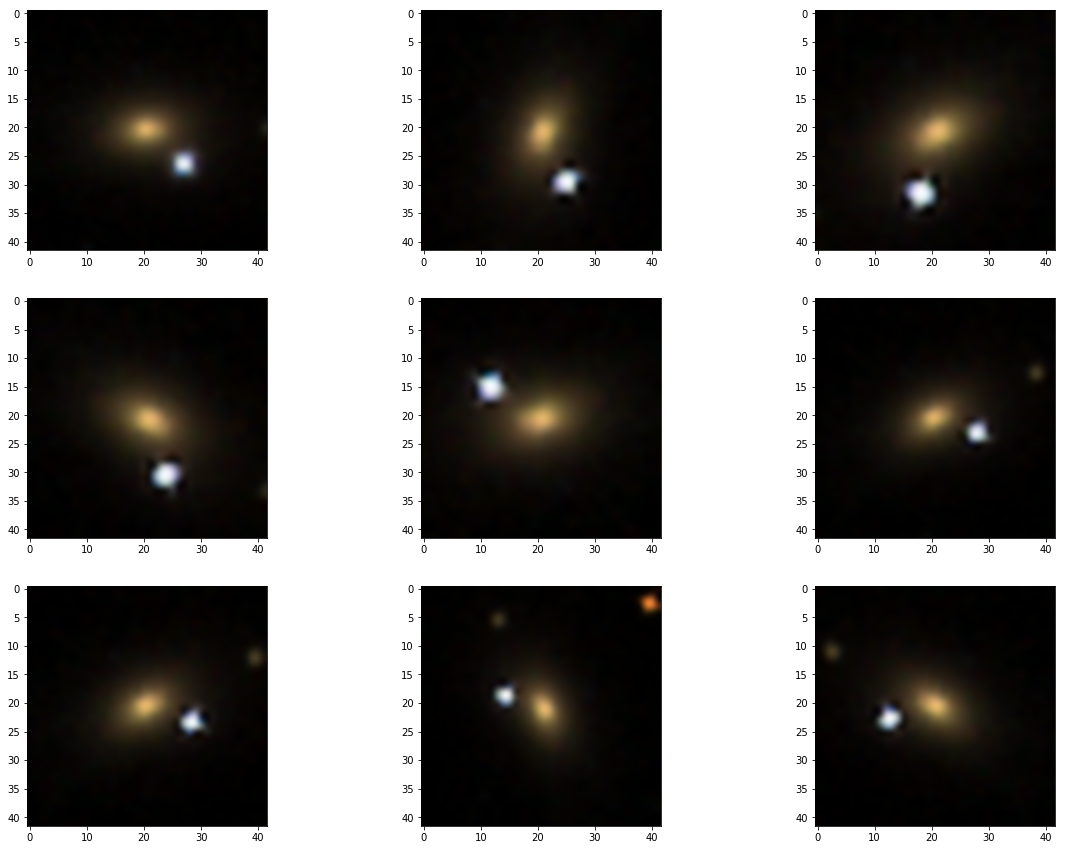

In [159]:
from PIL import Image

def flip_horizontal(data):
    return np.flip(data, 2)

def flip_vertical(data):
    return np.flip(data, 1)

def rotate(data, deg):
    for idx in range(data.shape[0]):
        img = Image.fromarray(data[idx])
        img = img.rotate(deg, resample=Image.BICUBIC, expand=True)
        
        if (idx == 0):
            out = np.empty((3,) + img.size)

        out[idx] = np.array(img)

    return out

def resize(data, factor):
    new_size = int(np.round(factor * data.shape[1]))
    
    out = np.empty((3, new_size, new_size))
    
    for idx in range(data.shape[0]):
        img = Image.fromarray(data[idx])
        img = img.resize((new_size, new_size), resample=Image.BICUBIC)
        out[idx] = np.array(img)
    return out

def crop(data, crop_size=42):
    curr_size = data.shape[1]
    out = np.empty((3, 42, 42))

    top = int((curr_size - crop_size)/2)
    bttm = top + crop_size

    for idx in range(3):
        out[idx] = data[idx, top:bttm, top:bttm]

    return out

img_data = fits_file[0].data

outputs = np.empty((9, 3, 42, 42))
outputs[0] = sgd.scale_rgb(crop(img_data), sigma=1/6)
generator = image_augementation_generator(0.5)
for idx in range(1,9):
    angle, zoom, flip_h, flip_v = next(generator)
    print(f'Rotate: {angle}, Zoom: {zoom}, Flip Horizon.: {flip_h}, Flip Vertical: {flip_v}')
    data = rotate(img_data, angle)
    data = resize(data, zoom)

    if flip_h:
        data = flip_horizontal(data)
    
    if flip_v:
        data = flip_vertical(data)
        
    data = crop(data)
    outputs[idx] = sgd.scale_rgb(data, sigma=1/6)

plot_images(np.moveaxis(outputs, 1, -1), 9)


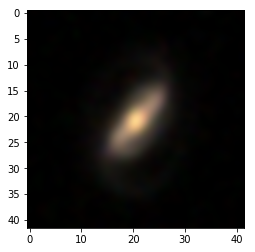

In [142]:
import sdss_gz_data as sgd
import matplotlib.pyplot as plt

#Image.fromarray(np.moveaxis(sgd.scale_rgb(img_data), 0, -1))
plt.imshow(np.moveaxis(sgd.scale_rgb(crop(img_data)), 0, -1), interpolation='bicubic')

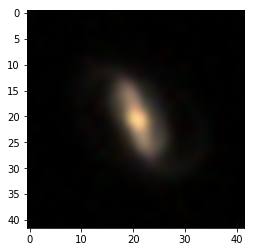

In [143]:
plt.imshow(np.moveaxis(sgd.scale_rgb(crop(rotated_image)), 0, -1), interpolation='bicubic')

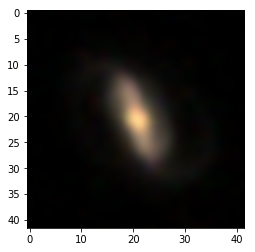

In [144]:
plt.imshow(np.moveaxis(sgd.scale_rgb(crop(resized)), 0, -1), interpolation='bicubic')

In [160]:
from astropy.io import fits

In [162]:
fits_file = fits.open('data/obj-1237650369407221944.fits.bz2')
data = fits_file[0].data

In [167]:
data.shape

(3, 72, 72)

In [172]:
nans = np.isnan(data)

In [173]:
data[nans] = 0

In [174]:
np.min(data)

-0.07396627962589264

In [175]:
data[nans] = np.min(data)

In [176]:
data

array([[[-1.12121487e-02, -1.02977147e-02, -1.67172495e-02, ...,
          7.03252293e-03, -2.38843542e-03,  1.73510388e-02],
        [-1.97515506e-02,  1.97255891e-03,  1.48004815e-02, ...,
         -2.76999101e-02, -1.27637596e-03,  2.63085775e-02],
        [-1.85356569e-02, -1.71290860e-02,  1.34836566e-02, ...,
          1.04973605e-02,  1.98583249e-02,  7.58936908e-03],
        ...,
        [-7.39662796e-02, -7.39662796e-02, -7.39662796e-02, ...,
         -7.39662796e-02, -7.39662796e-02, -7.39662796e-02],
        [-7.39662796e-02, -7.39662796e-02, -7.39662796e-02, ...,
         -7.39662796e-02, -7.39662796e-02, -7.39662796e-02],
        [-7.39662796e-02, -7.39662796e-02, -7.39662796e-02, ...,
         -7.39662796e-02, -7.39662796e-02, -7.39662796e-02]],

       [[ 1.32465828e-02, -4.25537059e-04, -3.65608162e-03, ...,
         -5.12303086e-03, -4.71840193e-03, -4.22300684e-04],
        [ 1.19758882e-02,  2.36811419e-03,  6.09200774e-03, ...,
          2.07289364e-02,  2.08113715e